Nechama Wilhelm

In [ ]:
#loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/ADMISSIONS.csv.gz ./
!cp drive/MyDrive/ICUSTAYS.csv.gz ./
!cp drive/MyDrive/PATIENTS.csv.gz ./
!cp drive/MyDrive/DIAGNOSES_ICD.csv.gz ./

In [ ]:
Admissions = pd.read_csv('ADMISSIONS.csv.gz', compression='gzip')
Icustays = pd.read_csv('ICUSTAYS.csv.gz', compression='gzip')
Patients = pd.read_csv('PATIENTS.csv.gz', compression='gzip')
Icd9_code = pd.read_csv('DIAGNOSES_ICD.csv.gz',compression='gzip')

In [ ]:
#glancing at the admissions data
Admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [ ]:
#changing the admittime and discharge to the date datatypes
Admissions.ADMITTIME = pd.to_datetime(Admissions.ADMITTIME)
Admissions.DISCHTIME = pd.to_datetime(Admissions.DISCHTIME)

In [ ]:
#calulate the length of say
Admissions['LOS'] = Admissions.DISCHTIME - Admissions.ADMITTIME

In [ ]:
#look and the new info
Admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   ROW_ID                58976 non-null  int64          
 1   SUBJECT_ID            58976 non-null  int64          
 2   HADM_ID               58976 non-null  int64          
 3   ADMITTIME             58976 non-null  datetime64[ns] 
 4   DISCHTIME             58976 non-null  datetime64[ns] 
 5   DEATHTIME             5854 non-null   object         
 6   ADMISSION_TYPE        58976 non-null  object         
 7   ADMISSION_LOCATION    58976 non-null  object         
 8   DISCHARGE_LOCATION    58976 non-null  object         
 9   INSURANCE             58976 non-null  object         
 10  LANGUAGE              33644 non-null  object         
 11  RELIGION              58518 non-null  object         
 12  MARITAL_STATUS        48848 non-null  object         
 13  E

In [ ]:
#change LOS to show the value in format of days
Admissions.LOS = Admissions.LOS/pd.Timedelta(days=1)

In [ ]:
Admissions.sort_values(by=['LOS']).head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
48416,50721,74150,126852,2150-11-25 22:43:00,2150-11-25 00:02:00,2150-11-25 00:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,NOT SPECIFIED,NaN,UNABLE TO OBTAIN,2150-11-25 21:46:00,2150-11-25 23:00:00,S/P FALL,1,1,-0.945139
54371,55343,88691,134547,2152-06-03 20:15:00,2152-06-03 00:00:00,2152-06-03 00:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,PTUN,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,2152-06-03 17:51:00,2152-06-03 18:41:00,HEMOPARINEUM,1,1,-0.843750
692,644,516,187482,2197-07-31 20:18:00,2197-07-31 01:10:00,2197-07-31 01:10:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,WIDOWED,UNKNOWN/NOT SPECIFIED,2197-07-31 11:31:00,2197-07-31 14:35:00,RESPIRATORY DISTRESS,1,0,-0.797222
46563,48268,66298,152072,2104-10-23 18:28:00,2104-10-23 00:01:00,2104-10-23 00:01:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,NOT SPECIFIED,SINGLE,WHITE,2104-10-23 15:16:00,2104-10-23 19:43:00,AORTIC DISSECTION,1,1,-0.768750
33867,32289,26393,149356,2120-01-02 20:07:00,2120-01-02 02:08:00,2120-01-02 02:08:00,URGENT,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,AOROTOENTERIC FISTULA,1,0,-0.749306


In [ ]:
#remove all los less than 0- death before admission
Admissions = Admissions[Admissions['LOS']>0]

In [ ]:
Admissions.DISCHARGE_LOCATION.unique()

array(['DISC-TRAN CANCER/CHLDRN H', 'HOME HEALTH CARE', 'HOME',
       'DEAD/EXPIRED', 'REHAB/DISTINCT PART HOSP',
       'LONG TERM CARE HOSPITAL', 'DISC-TRAN TO FEDERAL HC', 'SNF',
       'SHORT TERM HOSPITAL', 'HOSPICE-MEDICAL FACILITY',
       'HOME WITH HOME IV PROVIDR', 'HOSPICE-HOME',
       'LEFT AGAINST MEDICAL ADVI', 'DISCH-TRAN TO PSYCH HOSP',
       'OTHER FACILITY', 'ICF', 'SNF-MEDICAID ONLY CERTIF'], dtype=object)

In [ ]:
#remove all row where the patient expired
Admissions = Admissions[Admissions['DISCHARGE_LOCATION']!= 'DEAD/EXPIRED']

In [ ]:
#get mean, median, and mac of los
print(Admissions.LOS.mean())
print(Admissions.LOS.median())
print(Admissions.LOS.max())

10.138173704219813
6.565972222222222
294.66041666666666


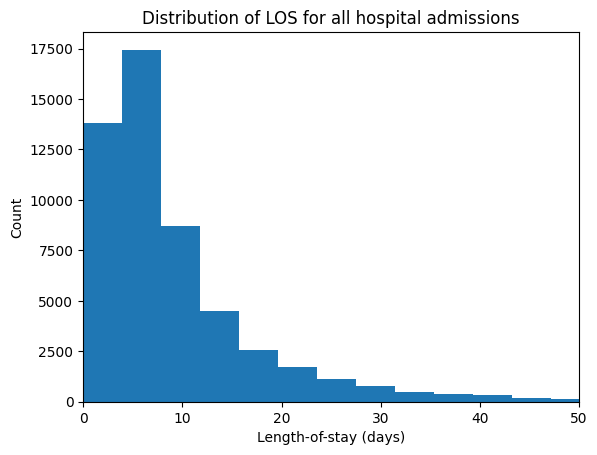

In [ ]:
#plot a histogram of the los
plt.hist(Admissions['LOS'], bins=75)
plt.xlabel('Length-of-stay (days)')
plt.ylabel('Count')
plt.title('Distribution of LOS for all hospital admissions')
plt.xlim(0,50)
plt.show()

In [ ]:
Admissions.ETHNICITY.unique()

array(['WHITE', 'UNKNOWN/NOT SPECIFIED', 'MULTI RACE ETHNICITY',
       'BLACK/AFRICAN AMERICAN', 'HISPANIC OR LATINO',
       'PATIENT DECLINED TO ANSWER', 'ASIAN', 'OTHER',
       'HISPANIC/LATINO - GUATEMALAN', 'ASIAN - VIETNAMESE',
       'AMERICAN INDIAN/ALASKA NATIVE', 'WHITE - RUSSIAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - CHINESE',
       'ASIAN - ASIAN INDIAN', 'BLACK/AFRICAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - DOMINICAN',
       'UNABLE TO OBTAIN', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'SOUTH AMERICAN',
       'WHITE - EASTERN EUROPEAN', 'CARIBBEAN ISLAND', 'ASIAN - FILIPINO',
       'ASIAN - CAMBODIAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'WHITE - BRAZILIAN', 'ASIAN - KOREAN',
       'HISPANIC/LATINO - COLOMBIAN', 'ASIAN - JAPANESE',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ASIAN - THAI',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - CUBAN',
       'MID

In [ ]:
#get new ethinicty names
ethinic_new = {'UNKNOWN/NOT SPECIFIED':'OTHER/UNKNOWN', 'MULTI RACE ETHNICITY': 'OTHER/UNKNOWN', 'HISPANIC OR LATINO': 'HISPANIC/LATINO',
               'PATIENT DECLINED TO ANSWER': 'OTHER/UNKNOWN', 'OTHER':'OTHER/UNKNOWN', 'HISPANIC/LATINO - GUATEMALAN':'HISPANIC/LATINO',
               'ASIAN - VIETNAMESE': 'ASIAN', 'AMERICAN INDIAN/ALASKA NATIVE':'OTHER/UNKNOWN', 'WHITE - RUSSIAN':'WHITE',
               'HISPANIC/LATINO - PUERTO RICAN':'HISPANIC/LATINO', 'ASIAN - CHINESE':'ASIAN', 'ASIAN - ASIAN INDIAN':'ASIAN', 'BLACK/AFRICAN':'BLACK/AFRICAN AMERICAN',
               'HISPANIC/LATINO - SALVADORAN':'HISPANIC/LATINO', 'HISPANIC/LATINO - DOMINICAN':'HISPANIC/LATINO', 'UNABLE TO OBTAIN':'OTHER/UNKNOWN',
               'BLACK/CAPE VERDEAN':'BLACK/AFRICAN AMERICAN', 'BLACK/HAITIAN':'BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN':'WHITE', 'PORTUGUESE':'WHITE',
               'SOUTH AMERICAN':'HISPANIC/LATINO', 'WHITE - EASTERN EUROPEAN':'WHITE', 'CARIBBEAN ISLAND':'HISPANIC/LATINO', 'ASIAN - FILIPINO':'ASIAN',
               'ASIAN - CAMBODIAN':'ASIAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)':'HISPANIC/LATINO', 'WHITE - BRAZILIAN':'WHITE',
               'ASIAN - KOREAN':'ASIAN', 'HISPANIC/LATINO - COLOMBIAN':'HISPANIC/LATINO', 'ASIAN - JAPANESE':'ASIAN',
               'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER':'OTHER/UNKNOWN', 'ASIAN - THAI':'ASIAN', 'HISPANIC/LATINO - HONDURAN':'HISPANIC/LATINO',
               'HISPANIC/LATINO - CUBAN':'HISPANIC/LATINO', 'MIDDLE EASTERN':'OTHER/UNKNOWN', 'ASIAN - OTHER':'ASIAN', 'HISPANIC/LATINO - MEXICAN':'HISPANIC/LATINO',
               'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE':'OTHER/UNKNOWN'}

In [ ]:
#replace ethnicity names to be 5 categories
Admissions['ETHNICITY'] = Admissions['ETHNICITY'].replace(ethinic_new)

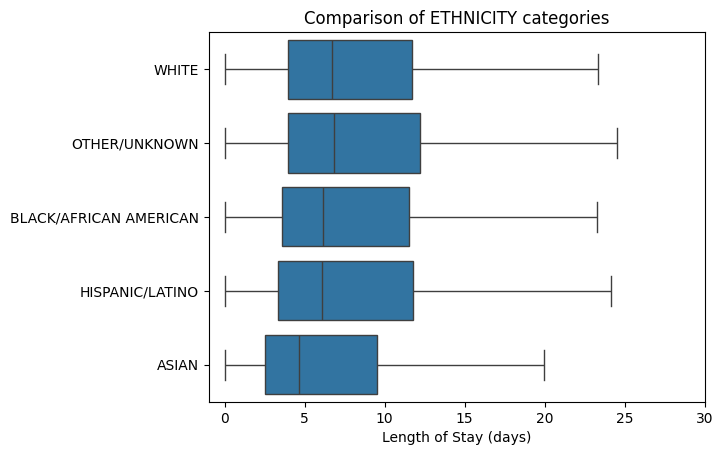

In [ ]:
#comparison of los by ethnicity
sns.boxplot(data=Admissions, x='LOS',y='ETHNICITY', showfliers=False)
plt.xlim(-1,30)
plt.xlabel('Length of Stay (days)')
plt.ylabel('')
plt.title('Comparison of ETHNICITY categories')
plt.show()

In [ ]:
Admissions.RELIGION.unique()

array(['UNOBTAINABLE', 'CATHOLIC', 'PROTESTANT QUAKER', 'NOT SPECIFIED',
       'JEWISH', 'BUDDHIST', 'OTHER', "JEHOVAH'S WITNESS", nan,
       'GREEK ORTHODOX', 'EPISCOPALIAN', 'HINDU', 'CHRISTIAN SCIENTIST',
       'HEBREW', 'METHODIST', 'UNITARIAN-UNIVERSALIST', 'BAPTIST',
       '7TH DAY ADVENTIST', 'MUSLIM', 'ROMANIAN EAST. ORTH', 'LUTHERAN'],
      dtype=object)

In [ ]:
#get new religion names
religion_new = {'CATHOLIC':'RELIGIOUS', 'PROTESTANT QUAKER':'RELIGIOUS', 'JEWISH':'RELIGIOUS', 'BUDDHIST':'RELIGIOUS', 'OTHER':'NOT SPECIFIED',
                "JEHOVAH'S WITNESS":'RELIGIOUS', 'nan': 'NOT SPECIFIED', 'GREEK ORTHODOX':'RELIGIOUS', 'EPISCOPALIAN':'RELIGIOUS', 'HINDU':'RELIGIOUS',
                'CHRISTIAN SCIENTIST':'RELIGIOUS', 'HEBREW':'RELIGIOUS', 'METHODIST':'RELIGIOUS', 'UNITARIAN-UNIVERSALIST':'RELIGIOUS',
                'BAPTIST':'RELIGIOUS', '7TH DAY ADVENTIST':'RELIGIOUS','MUSLIM':'RELIGIOUS', 'ROMANIAN EAST. ORTH':'RELIGIOUS', 'LUTHERAN':'RELIGIOUS'}

In [ ]:
#replace religion with 3 categories
Admissions['RELIGION'] = Admissions['RELIGION'].replace(religion_new)

In [ ]:
Admissions['RELIGION'] = Admissions['RELIGION'].fillna('NOT SPECIFIED')

In [ ]:
Admissions.RELIGION.unique()

array(['UNOBTAINABLE', 'RELIGIOUS', 'NOT SPECIFIED'], dtype=object)

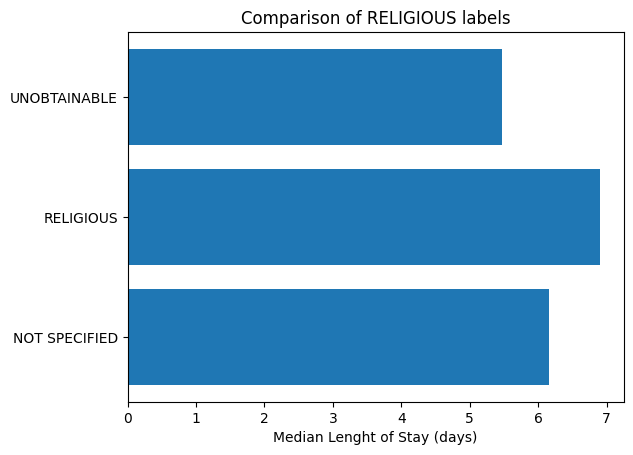

In [ ]:
#plot median los by religious category
plt.barh(Admissions.groupby('RELIGION')['LOS'].median().index, Admissions.groupby('RELIGION')['LOS'].median().values)
plt.ylabel('')
plt.xlabel('Median Lenght of Stay (days)')
plt.title('Comparison of RELIGIOUS labels')
plt.show()

In [ ]:
Admissions.ADMISSION_TYPE.unique()

array(['EMERGENCY', 'ELECTIVE', 'NEWBORN', 'URGENT'], dtype=object)

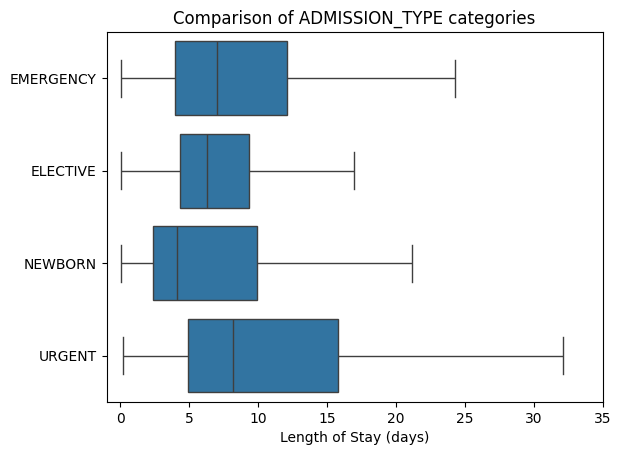

In [ ]:
#plot comparison of los by admission type
sns.boxplot(data=Admissions, x='LOS',y='ADMISSION_TYPE', showfliers=False)
plt.xlim(-1,35)
plt.xlabel('Length of Stay (days)')
plt.ylabel('')
plt.title('Comparison of ADMISSION_TYPE categories')
plt.show()

In [ ]:
Admissions.INSURANCE.unique()

array(['Private', 'Medicare', 'Medicaid', 'Self Pay', 'Government'],
      dtype=object)

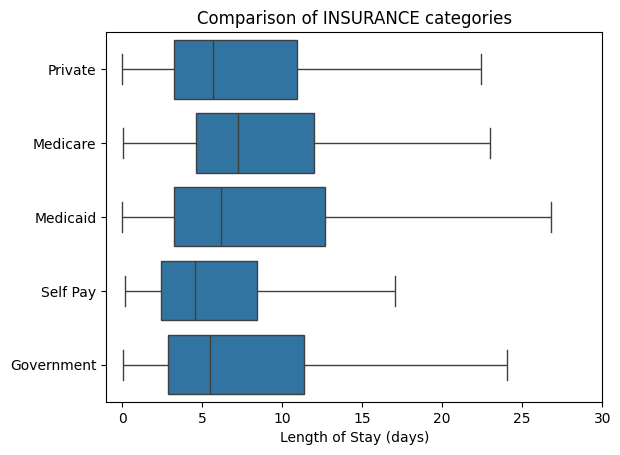

In [ ]:
#plot comparion of los by insurance type
sns.boxplot(data=Admissions, x='LOS',y='INSURANCE', showfliers=False)
plt.xlim(-1,30)
plt.xlabel('Length of Stay (days)')
plt.ylabel('')
plt.title('Comparison of INSURANCE categories')
plt.show()

In [ ]:
#merge admission admittime and patient dob to get the age
patients_for_age = Patients[['SUBJECT_ID','DOB']]
admissions_for_age = Admissions[['SUBJECT_ID','ADMITTIME']]

age_df = pd.merge(admissions_for_age, patients_for_age, on='SUBJECT_ID')
age_df.head()

,SUBJECT_ID,ADMITTIME,DOB
0,22,2196-04-09 12:26:00,2131-05-07 00:00:00
1,23,2153-09-03 07:15:00,2082-07-17 00:00:00
2,23,2157-10-18 19:34:00,2082-07-17 00:00:00
3,24,2139-06-06 16:14:00,2100-05-31 00:00:00
4,25,2160-11-02 02:06:00,2101-11-21 00:00:00


In [ ]:
#group to get only one row per subject
age_df = age_df[['SUBJECT_ID', 'ADMITTIME', 'DOB']].groupby('SUBJECT_ID').min().reset_index()
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42121 entries, 0 to 42120
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SUBJECT_ID  42121 non-null  int64         
 1   ADMITTIME   42121 non-null  datetime64[ns]
 2   DOB         42121 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 987.3+ KB


In [ ]:
##caluculate the age for each subject
age_df['DOB'] = pd.to_datetime(age_df['DOB']).dt.date
age_df['ADMITTIME'] = pd.to_datetime(age_df['ADMITTIME']).dt.date
#age_df.info()
age_df['AGE'] = (age_df['ADMITTIME'] - age_df['DOB'])
#age_df.head()

##clean the column to only have the year
age_df['AGE'] = age_df['AGE']/365.25
age_df['AGE'] = age_df['AGE'].astype(str)
age_df['AGE'] = age_df['AGE'].str.replace(' days.*', '', regex=True)
age_df['AGE'] = age_df['AGE'].astype(int)

#chagne all over 90 to 90
age_df['AGE'] = age_df['AGE'].apply(lambda x: 90 if x > 89 else x)
age_df.sort_values('AGE', ascending=False).head()

,SUBJECT_ID,ADMITTIME,DOB,AGE
41578,97670,2120-11-30,1820-11-30,90
30990,52653,2180-05-16,1880-05-16,90
2766,3216,2172-07-15,1872-07-15,90
32695,59807,2114-08-01,1814-08-01,90
26810,31407,2106-02-07,1806-02-07,90


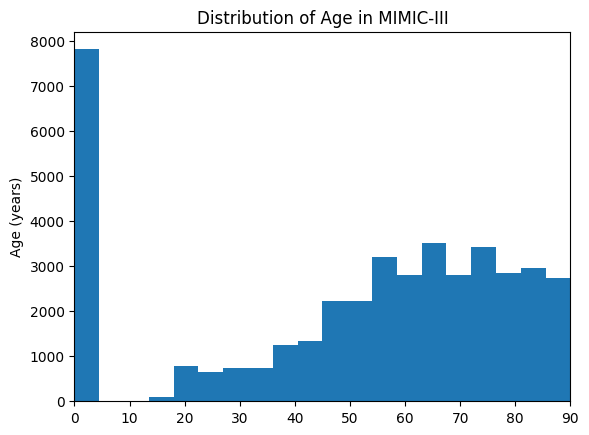

In [ ]:
#histogram of age
plt.hist(age_df['AGE'], bins=20)
plt.ylabel('Age (years)')
plt.title('Distribution of Age in MIMIC-III')
plt.xlim(0,90)
plt.show()

In [ ]:
#create age categories
age_cats = { (0,2): 'newborn', (3,18): 'young adult', (19,60): 'middle age', (61,100): 'senior'}

#function to add categries to the table
def categorize_age(age):
    for age_range, category in age_cats.items():
        if age_range[0] <= age <= age_range[1]:
            return category

#add age categories
age_df['AGE_CAT'] = age_df['AGE'].apply(categorize_age)

In [ ]:
#add the age to the admissions dataset
df= age_df[['SUBJECT_ID', 'AGE', 'AGE_CAT']]
Admissions2 = pd.merge( df, Admissions,on=('SUBJECT_ID'))

In [ ]:
Admissions2.head()

,SUBJECT_ID,AGE,AGE_CAT,ROW_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
0,2,0,newborn,1,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,3.863889
1,3,76,senior,2,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,NaN,RELIGIOUS,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,10.784722
2,4,47,middle age,3,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,NaN,RELIGIOUS,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,7.759028
3,5,0,newborn,4,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,NaN,RELIGIOUS,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,2.322222
4,6,65,senior,5,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,16.364583


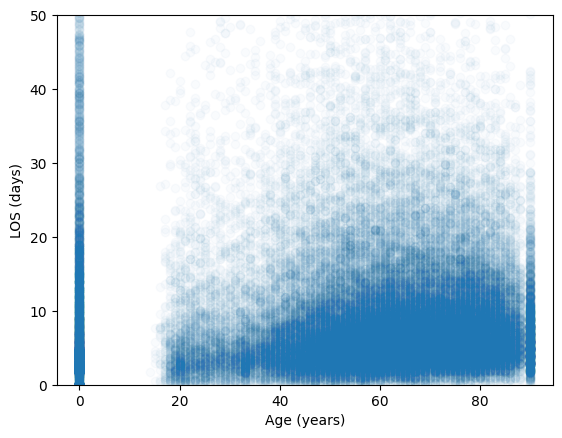

In [ ]:
#dotplot of age to los
plt.scatter(data=Admissions2, x='AGE', y='LOS', alpha=0.025)
plt.xlabel('Age (years)')
plt.ylabel('LOS (days)')
plt.ylim(0,50)
plt.show()

In [ ]:
Icd9_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [ ]:
#create column of first 3 letters of the each icd code
Icd9_code['icd_main'] = Icd9_code['ICD9_CODE'].str[:3]
Icd9_code.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,icd_main
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425


In [ ]:
print(len(Icd9_code.ICD9_CODE.unique()))
len(Icd9_code.icd_main.unique())

6985


943

In [ ]:
Icd9_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
 5   icd_main    651000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 29.8+ MB


In [ ]:
#change any letters to a 9 so will be in the 900 category
Icd9_code['icd_main'] = Icd9_code['icd_main'].str.replace(r'^[VE]','9', regex=True)

In [ ]:
#create a new column that puts the icd codes into 17 main categories
Icd9_code['ICD9_CAT'] = Icd9_code['icd_main'].apply(lambda x: 'injury' if x in (map(str, list(range(800,1000)))) else ('misc' if x in (map(str, list(range(780,800))))
  else ('prenatal' if x in (map(str, list(range(760,780)))) else ('congenital' if x in (map(str, list(range(740,760)))) else ('muscular' if x in (map(str, list(range(710,740))))
  else ('prenatal' if x in (map(str, list(range(760,780)))) else ('congenital' if x in (map(str, list(range(740,760)))) else ('muscular' if x in (map(str, list(range(710,740))))
  else ('skin' if x in (map(str, list(range(680,710)))) else ('pregnancy' if x in (map(str, list(range(630,680)))) else ('genitourinary' if x in (map(str, list(range(580,630))))
  else ('digestive' if x in (map(str, list(range(520,580)))) else ('respiratory' if x in (map(str, list(range(460,520)))) else ('circulatory' if x in (map(str, list(range(390,460))))
  else ('nervous' if x in (map(str, list(range(320,390)))) else ('mental' if x in (map(str, list(range(290,320)))) else('blood' if x in (map(str, list(range(280,290))))
  else ('endocrine' if x in (map(str, list(range(240,280)))) else ('neoplasms' if x in (map(str, list(range(140,240)))) else 'infectious')))))))))))))))))))

In [ ]:
Icd9_code.sort_values('ICD9_CODE', ascending=False).head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,icd_main,ICD9_CAT
582753,602073,89303,139801,23.0,V9103,991,injury
161295,139520,12367,131308,18.0,V9089,990,injury
428676,430960,51390,162668,10.0,V9081,990,injury
450469,444284,54221,107972,18.0,V9081,990,injury
642225,640884,97733,177960,17.0,V9081,990,injury


In [ ]:
#create a pivot table the get the count of each diagnosis per patient
Icd9_cat = Icd9_code[['HADM_ID','ICD9_CAT']]
icd9_cat_matrix = pd.pivot_table(Icd9_cat, index='HADM_ID', columns='ICD9_CAT', aggfunc=len, fill_value=0)

In [ ]:
icd9_cat_matrix.head()

ICD9_CAT,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
HADM_ID,,,,,,,,,,,,,,,,,
100001,0,2,0,2,5,2,0,2,0,0,0,0,2,0,0,0,1
100003,1,2,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0
100006,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,3,0
100007,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0
100009,1,7,0,0,3,0,0,7,0,0,0,0,0,0,0,0,0


In [ ]:
#merge table to admissions
Admissions3 = pd.merge( Admissions2, icd9_cat_matrix,on=('HADM_ID'))

In [ ]:
Admissions3.head()

,SUBJECT_ID,AGE,AGE_CAT,ROW_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,2,0,newborn,1,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,3,0,0,0,0,0,0,0,0,0
1,3,76,senior,2,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,0,0,1,0,0,0,0,0,0,1
2,4,47,middle age,3,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,2,0,2,0,0,0,0,0,0,0
3,5,0,newborn,4,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,3,0,0,0,0,0,0,0,0,0
4,6,65,senior,5,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,2,0,0,0,0,0,0,0,0,0


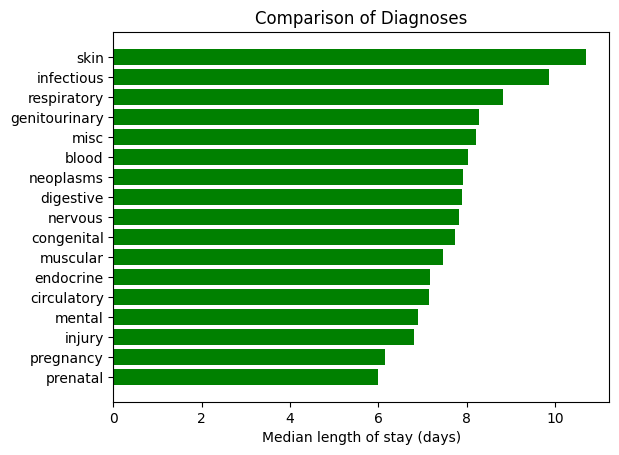

In [ ]:
#loop thru categories to create bar plot of the median length of stay
for category in ['prenatal','pregnancy','injury','mental','circulatory','endocrine','muscular','congenital','nervous','digestive','neoplasms'
                 ,'blood','misc','genitourinary','respiratory','infectious','skin']:

                 plt.barh([category], Admissions3[Admissions3[category]!=0]['LOS'].median(), color='green')

plt.title('Comparison of Diagnoses')
plt.xlabel('Median length of stay (days)')
plt.show()

In [ ]:
#making sure no admissions resulting in deaths are in the dataset
Admissions3.DEATHTIME.notna().sum()

0

In [ ]:
Admissions3.columns

Index(['SUBJECT_ID', 'AGE', 'AGE_CAT', 'ROW_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'LOS', 'blood',
       'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary',
       'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms',
       'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin'],
      dtype='object')

In [ ]:
Admissions3.MARITAL_STATUS.unique()

array(['UNKNOWN', 'MARRIED', 'SINGLE', 'WIDOWED', 'DIVORCED', 'SEPARATED',
       'LIFE PARTNER'], dtype=object)

In [ ]:
#renaming and fill na of marital status
Admissions3['MARITAL_STATUS'] = Admissions3['MARITAL_STATUS'].replace({'UNKNOWN (DEFAULT)':'UNKNOWN'})
Admissions3['MARITAL_STATUS'] = Admissions3['MARITAL_STATUS'].fillna('UNKNOWN')

In [ ]:
Admissions3.ADMISSION_LOCATION.unique()

array(['PHYS REFERRAL/NORMAL DELI', 'EMERGENCY ROOM ADMIT',
       'TRANSFER FROM HOSP/EXTRAM', 'CLINIC REFERRAL/PREMATURE',
       'TRANSFER FROM OTHER HEALT', 'TRANSFER FROM SKILLED NUR',
       'HMO REFERRAL/SICK', '** INFO NOT AVAILABLE **',
       'TRSF WITHIN THIS FACILITY'], dtype=object)

In [ ]:
#replace locatiosn with referral, transfer or unknown
Admissions3.ADMISSION_LOCATION = Admissions3['ADMISSION_LOCATION'].replace({'PHYS REFERRAL/NORMAL DELI':'REFERRAL','TRANSFER FROM HOSP/EXTRAM':'TRANSFER'
                                                                            ,'TRANSFER FROM HOSP/EXTRAM':'TRANSFER','CLINIC REFERRAL/PREMATURE':'REFERRAL'
                                                                            ,'TRANSFER FROM OTHER HEALT':'TRANSFER', 'TRANSFER FROM SKILLED NUR':'TRANSFER'
                                                                            ,'HMO REFERRAL/SICK':'REFERRAL', '** INFO NOT AVAILABLE **':'UNKNOWN'
                                                                            ,'TRSF WITHIN THIS FACILITY':'TRANSFER'})

In [ ]:
#droping rows that are not needed or have too many NA values
LOS_cleaned = Admissions3.drop(['SUBJECT_ID','AGE','ROW_ID','HADM_ID','DEATHTIME','EDREGTIME','EDOUTTIME','ADMITTIME',
                                'DISCHTIME','HAS_CHARTEVENTS_DATA','HOSPITAL_EXPIRE_FLAG','DIAGNOSIS','DISCHARGE_LOCATION','LANGUAGE'], axis=1)
LOS_cleaned = LOS_cleaned.dropna()
LOS_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 53103
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE_CAT             53104 non-null  object 
 1   ADMISSION_TYPE      53104 non-null  object 
 2   ADMISSION_LOCATION  53104 non-null  object 
 3   INSURANCE           53104 non-null  object 
 4   RELIGION            53104 non-null  object 
 5   MARITAL_STATUS      53104 non-null  object 
 6   ETHNICITY           53104 non-null  object 
 7   LOS                 53104 non-null  float64
 8   blood               53104 non-null  int64  
 9   circulatory         53104 non-null  int64  
 10  congenital          53104 non-null  int64  
 11  digestive           53104 non-null  int64  
 12  endocrine           53104 non-null  int64  
 13  genitourinary       53104 non-null  int64  
 14  infectious          53104 non-null  int64  
 15  injury              53104 non-null  int64  
 16  ment

In [ ]:
#get dummies for columns
columns_to_dummies = ['ADMISSION_TYPE','INSURANCE','RELIGION','ETHNICITY','AGE_CAT','MARITAL_STATUS','ADMISSION_LOCATION']

dummy_cols = pd.get_dummies(LOS_cleaned[columns_to_dummies])
LOS_cleaned = pd.concat([LOS_cleaned, dummy_cols], axis=1)
LOS_cleaned.drop(columns_to_dummies, axis=1, inplace=True)


In [ ]:
LOS_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 53103
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LOS                                      53104 non-null  float64
 1   blood                                    53104 non-null  int64  
 2   circulatory                              53104 non-null  int64  
 3   congenital                               53104 non-null  int64  
 4   digestive                                53104 non-null  int64  
 5   endocrine                                53104 non-null  int64  
 6   genitourinary                            53104 non-null  int64  
 7   infectious                               53104 non-null  int64  
 8   injury                                   53104 non-null  int64  
 9   mental                                   53104 non-null  int64  
 10  misc                                     53104

In [ ]:
#import libraries for predicting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#get x and y train and test sets
features = LOS_cleaned.drop(['LOS'], axis=1)
LOS = LOS_cleaned['LOS'].values
X_train, X_test, y_train, y_test = train_test_split(features, LOS, test_size = .20, random_state=42)

In [ ]:
#list of models
models = [
    RandomForestRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    GradientBoostingRegressor(),
    SGDRegressor()
]

#for loop to get r2 of each model
r_squared=[]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  r_squared.append(r2)

<ipython-input-182-081899491ef0>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(r_squared)

[0.36451607813318654, 0.3034643089808231, 0.3483432977455889, 0.407348400502608, 0.3328424313931624]


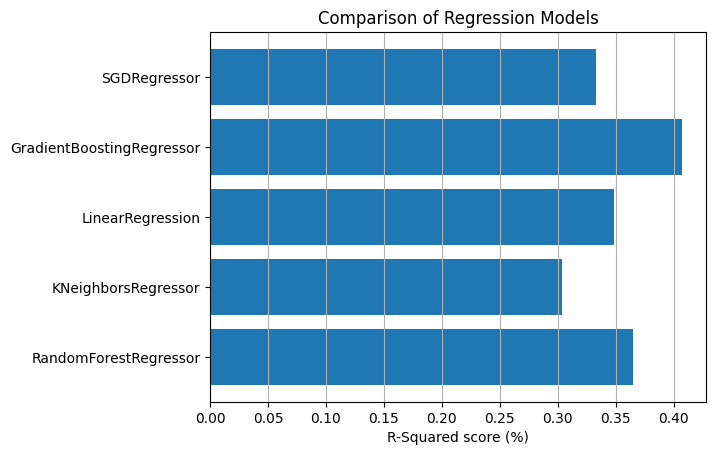

In [ ]:
#plot the r2 of models
model_names = ['RandomForestRegressor','KNeighborsRegressor','LinearRegression','GradientBoostingRegressor','SGDRegressor']
plt.barh(model_names, r_squared)
plt.title('Comparison of Regression Models')
plt.xlabel('R-Squared score (%)')
plt.grid(axis='x')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#grid search to find best params
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}
GradientBoostingRegressor = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=GradientBoostingRegressor, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

In [ ]:
best_params =grid_search.best_params_
best_score = grid_search.best_score_

print(best_params, best_score)

{'max_depth': 4, 'n_estimators': 200} 0.40750719814842096


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#fitting a new model
GradientBoostingRegressor = GradientBoostingRegressor(max_depth=4, n_estimators=200)
GradientBoostingRegressor.fit(X_train, y_train)

In [ ]:
#create data frame of features based on imporance
feature_importance = GradientBoostingRegressor.feature_importances_

df= pd.DataFrame({'Features':X_train.columns, 'Importance':feature_importance})
df = df.sort_values(by='Importance', ascending=False)

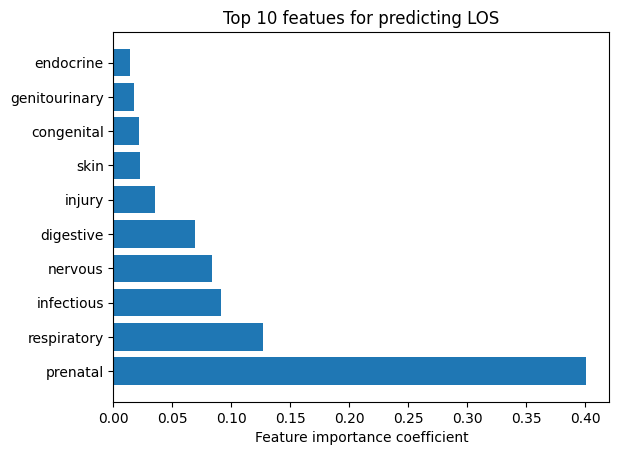

In [ ]:
plt_df = df.head(10)

plt.barh(plt_df['Features'], plt_df['Importance'])
plt.title('Top 10 featues for predicting LOS')
plt.xlabel('Feature importance coefficient')
plt.show()